# Python Analysis Lab

In [57]:
import matplotlib as plt
import numpy as np
import pandas as pd

In [58]:
drinks = pd.read_csv("starbucks-drinks-menu-expanded.csv")

In [59]:
# drinks.head(5)
# drinks.tail(5)
drinks

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


#### Dimensions

In [60]:
print("Number of rows:", drinks.shape[0])
print("Number of columns:", drinks.shape[1])

Number of rows: 242
Number of columns: 18


#### Column names

In [61]:
print(list(drinks))

['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)']


### Task 2

#### Summary statistics

In [62]:
print("Mean calories:", drinks.mean()["Calories"])
print("Variance of calories:", drinks.var()["Calories"])

Mean calories: 193.87190082644628
Variance of calories: 10580.859041185146


#### Generate histogram

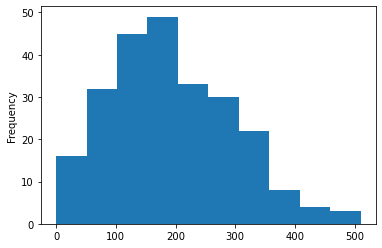

In [63]:
drinks["Calories"].plot(kind = "hist")

### Task 3

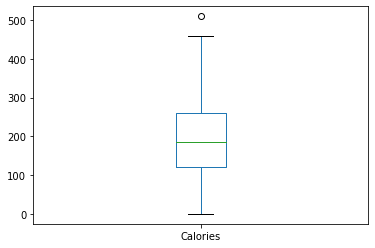

In [64]:
drinks["Calories"].plot(kind = "box")

From the boxplot, we see that there appears to be one outlier with an extremely high caloric value.

In [65]:
print(
    "This drink is the",
    drinks.loc[drinks["Calories"].idxmax()]["Beverage"],
    ", with a caloric value of",
    drinks["Calories"].max(),
    "calories."
)

This drink is the White Chocolate Mocha (Without Whipped Cream) , with a caloric value of 510 calories.


### Task 4

In [66]:
drinks_trim = drinks[["Beverage_category", "Beverage", "Beverage_prep", "Calories"]]

#### Find and drop NA values

In [67]:
print(
    "There are",
    drinks_trim.isnull().sum().sum(),
    "NaN values in the trimmed data set."
)

There are 0 NaN values in the trimmed data set.


### Task 5

In [70]:
espresso_drinks = drinks_trim[
    drinks_trim["Beverage_category"] == "Classic Espresso Drinks"
]

### Task 6

In [81]:
espresso_drinks.groupby("Beverage_prep")["Calories"].mean()

Beverage_prep
2% Milk               184.375
Doppio                 10.000
Grande                 15.000
Grande Nonfat Milk    150.000
Short                   5.000
Short Nonfat Milk      78.000
Solo                    5.000
Soymilk               151.250
Tall                   10.000
Tall Nonfat Milk      116.000
Venti                  25.000
Venti Nonfat Milk     194.000
Name: Calories, dtype: float64

### Task 7

In [77]:
espresso_drinks.groupby("Beverage_prep")["Calories"].mean().reset_index().sort_values("Calories", ascending=False)

,Beverage_prep,Calories
11,Venti Nonfat Milk,194.000
0,2% Milk,184.375
7,Soymilk,151.250
3,Grande Nonfat Milk,150.000
9,Tall Nonfat Milk,116.000
5,Short Nonfat Milk,78.000
10,Venti,25.000
2,Grande,15.000
1,Doppio,10.000
8,Tall,10.000
